# What is ensembling?

In general, ensembling is a technique of combining two or more algorithms of similar or dissimilar types called base learners. This is done to make a more robust system which incorporates the predictions from all the base learners. It can be understood as conference room meeting between multiple traders to make a decision on whether the price of a stock will go up or not.

Since all of them have a different understanding of the stock market and thus a different mapping function from the problem statement to the desired outcome. Therefore, they are supposed to make varied predictions on the stock price based on their own understandings of the market.

Now we can take all of these predictions into account while making the final decision. This will make our final decision more robust, accurate and less likely to be biased. The final decision would have been opposite if one of these traders would have made this decision alone.

You can consider another example of a candidate going through multiple rounds of job interviews. The final decision of candidate’s ability is generally taken based on the feedback of all the interviewers. Although a single interviewer might not be able to test the candidate for each required skill and trait. But the combined feedback of multiple interviewers usually helps in better assessment of the candidate.

## Types of ensembling

Some of the basic concepts which you should be aware of before we go into further detail are:

**Averaging:** It’s defined as taking the average of predictions from models in case of regression problem or while predicting probabilities for the classification problem.

Majority vote: It’s defined as taking the prediction with maximum vote / recommendation from multiple models predictions while predicting the outcomes of a classification problem.

Weighted average: In this, different weights are applied to predictions from multiple models then taking the average which means giving high or low importance to specific model output.


**Boosting:**

Boosting is a sequential technique in which, the first algorithm is trained on the entire dataset and the subsequent algorithms are built by fitting the residuals of the first algorithm, thus giving higher weight to those observations that were poorly predicted by the previous model.

It relies on creating a series of weak learners each of which might not be good for the entire dataset but is good for some part of the dataset. Thus, each model actually boosts the performance of the ensemble.

It’s really important to note that boosting is focused on reducing the bias. This makes the boosting algorithms prone to overfitting. Thus, parameter tuning becomes a crucial part of boosting algorithms to make them avoid overfitting.


Some examples of boosting are XGBoost, GBM, ADABOOST, etc.

**Stacking:**

In stacking multiple layers of machine learning models are placed one over another where each of the models passes their predictions to the model in the layer above it and the top layer model takes decisions based on the outputs of the models in layers below i

Practically speaking, there can be a countless number of ways in which you can ensemble different models. But these are some techniques that are mostly used:

**Bagging:** 

Bagging is also referred to as bootstrap aggregation. To understand bagging, we first need to understand bootstrapping. Bootstrapping is a sampling technique in which we choose ‘n’ observations or rows out of the original dataset of ‘n’ rows as well. But the key is that each row is selected with replacement from the original dataset so that each row is equally likely to be selected in each iteration. 



**“The whole is greater than the sum of its parts.” – Aristotle**

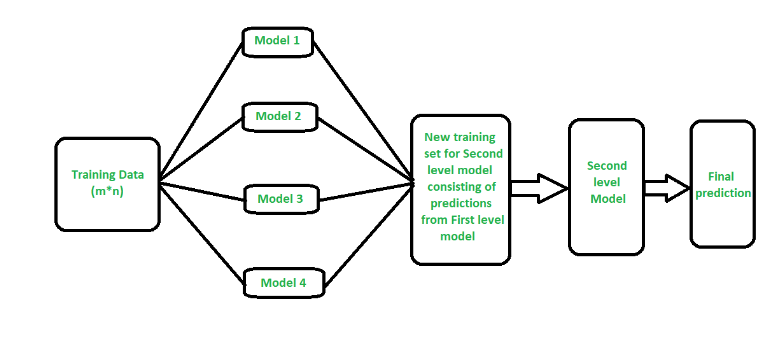
# Load Lib 

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone,ClassifierMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 214 ms, sys: 47.7 ms, total: 262 ms
Wall time: 386 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# 1-Preprocessing

## Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Reduce Memory

In [4]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


## X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

## Imput before Descritaziation : 

### IterativeImputer


In [7]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            'gpu_id':0, 
            'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
             'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

CPU times: user 393 µs, sys: 52 µs, total: 445 µs
Wall time: 401 µs


In [8]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 2min 20s, sys: 2.39 s, total: 2min 22s
Wall time: 2min 23s


In [9]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 2min 45s, sys: 963 ms, total: 2min 46s
Wall time: 2min 46s


In [10]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 

In [11]:
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

## Final X and y

In [12]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [13]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      101503 non-null  float16 
 1   DebtRatio                                 101503 non-null  float32 
 2   MonthlyIncome                             101503 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  101503 non-null  category
 4   cat_DebtRatio                             101503 non-null  category
 5   cat_MonthlyIncome                         101503 non-null  category
 6   NumberOfDependents                        101503 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      101503 non-null  int8    
 8   NumberRealEstateLoansOrLines              101503 non-null  int8    
 9   NumberOfTimes90DaysLate                   101503 non-null  int8    
 10  NumberOf

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      150000 non-null  float16 
 1   DebtRatio                                 150000 non-null  float32 
 2   MonthlyIncome                             150000 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  150000 non-null  category
 4   cat_DebtRatio                             150000 non-null  category
 5   cat_MonthlyIncome                         150000 non-null  category
 6   NumberOfDependents                        150000 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      150000 non-null  int8    
 8   NumberRealEstateLoansOrLines              150000 non-null  int8    
 9   NumberOfTimes90DaysLate                   150000 non-null  int8    
 10  NumberOf

In [15]:
del train
del test 
del train_final
del test_final

In [16]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

### Num Features



In [17]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

# FE

In [18]:
class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

1. Add bin data 

## Pipe : 


In [19]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

# Selected Models :

In [20]:
params_hgbc = {'l2_regularization': 2.940296779699346e-10, 
         'early_stopping': 'False',
         'learning_rate': 0.015318591316397998, 
         'max_iter': 1537, 
         'max_depth': 19, 
         'max_bins': 137, 
         'min_samples_leaf': 140,
         'max_leaf_nodes': 23}
model_hgbc = HistGradientBoostingClassifier(**params_hgbc)

 #Private Score 0.86875  Public Score 0.86245
pipe1_model_hgbc_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        #('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
        #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_hgbc)
    ]
)
pipe1_model_hgbc_woe_powertransformer2 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            # ('dim_red', SelectKBest(f_regression, k=20)),
            #('Sparseinteractions', SparseInteractions(degree=2)),
             #('PolynomialFeatures', PolynomialFeatures(degree=2)),
            #('PCAreducer', PCA(n_components=0.8)),
            ('classifier',model_hgbc)
        ]
    )
# Private Score 0.86861  Public Score 0.86236
pipe1_model_hgbc_woe_powertransformer2 
#pipe1_model_hgbc_woe_powertransformer


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(early_stopping='False',
                                                l2_regularization=2.940296779699346e-10,
                                                learning_rate=0.015318591316397998,
                                                max_bins=137, max_depth=19,
                                                max_iter=1537,
                                                max_leaf_nodes=23,
                                                min_samples_leaf=140))])

**2-CatBoost**

In [21]:
params_catboost = { "random_state": 42,
                    "loss_function":"Logloss",
                    "eval_metric":"AUC",
                    #"task_type" : "GPU",
                   'learning_rate': 0.03174251209279996,
                   'iterations': 1957,
                   'objective': 'CrossEntropy',
                   'colsample_bylevel': 0.05457006237382004,
                   'depth': 4,
                   'boosting_type': 'Ordered',
                   'bootstrap_type': 'MVS',
                   'verbose':False
                  }
model_catboost = CatBoostClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_catboost)
pipe1_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)
# Private Score 0.86903  Public Score 0.86217
#pipe1_model_catboost_woe_powertransformer

**-3 XGBR**

In [22]:
params_xgbr = { "verbosity": 0,
                "objective": "binary:logistic",
                "eval_metric": "auc",
                'random_state': 42,
                # regression
                #'objective':'reg:squarederror', 
                # 'eval_metric': 'mae',
                #early_stopping_rounds=100 ,
                'gpu_id':0, 
                'predictor':"gpu_predictor",
                # use exact for small dataset.
                #"tree_method": "exact",
                # big data :
                 'tree_method': 'gpu_hist',
                # defines booster, gblinear for linear functions.
               'booster': 'gbtree',
               'lambda': 0.05718879852112006,
               'alpha': 0.3744455966091751, 
               'subsample': 0.4600950043573827, 
               'colsample_bytree': 0.4826795171274075, 
               'learning_rate': 0.04028462871213848, 
               'n_estimators': 6258, 
               'max_depth': 3,
               'min_child_weight': 9,
               'eta': 1.0243140309668855e-07,
               'gamma': 0.0002882867942209271, 
               'grow_policy': 'lossguide'
              }
model_xgbr = XGBClassifier(
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             **params_xgbr)
pipe1_model_xgbr_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_xgbr)
    ]
)
#pipe1_model_xgbr_woe_powertransformer

**4-lgbm:**

In [23]:
params_lgbm =  {
               "objective": "binary",
                'random_state': 42,
                'metric': 'auc',
                "verbosity": -1,
                "boosting_type": "gbdt",
                "device": "gpu",
                #"early_stopping_rounds":100,
                'learning_rate': 0.005282912028625591, 
                'n_estimators': 1491,
                'lambda_l1': 2.5825901359648176e-05, 
                'lambda_l2': 4.490094872871969,
                'num_leaves': 76,
                'feature_fraction': 0.7099515479738928,
                'bagging_fraction': 0.8225459856082522,
                'bagging_freq': 3,
                'min_child_samples': 35
               }
model_lgbm = lgbm.LGBMClassifier(**params_lgbm,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm)
    ]
)
#pipe1_model_lgbm_woe_powertransformer

In [24]:
lgbm_param2={'learning_rate': 0.0018069834369607075,
                                 'max_depth': 8,
                                 #'max_features': 4,
                                 'min_samples_leaf': 47,
                                 #'min_samples_split': 389,
                                 'subsample': 0.8573598985000007,
                                 #'n_iter_no_change': 300,
                                 'n_estimators': 5000,
                                # 'verbose': 0,
                                 'random_state': 42,
                                 'metric': 'auc',
                                "device_type" : "gpu",
                                'boosting_type': 'gbdt',
                                'tree_method': "gpu_hist"
                               }

model_lgbm2 = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm2)
    ]
)
#pipe1_model_lgbm_woe_powertransformer2

# Best Pipes : 


In [25]:
pipe1_lgbm_woe_powertransformer93 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=93)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               verbose=-1,
                                               **lgbm_param2))
        ]
    )

pipe1_lgbm_woe_powertransformer = Pipeline(
                                steps=[
                                    ('preprocessor', preprocessor_woe_powertransformer),
                                    ('reducedim',  SelectPercentile( f_classif, percentile=98)),
                                    ('classifier',
                                     lgbm.LGBMClassifier( 
                                        #n_jobs=-1,
                                                                       verbose=-1,
                                                                       **lgbm_param2))
                                ]
                                )
pipe1_lgbm_woe_powertransformer90 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=90)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               verbose=-1,
                                               **lgbm_param2))
        ]
    )
pipe1_lgbm_woe_powertransformer95 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer),
            ('reducedim',  SelectPercentile( f_classif, percentile=95)),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               verbose=-1,
                                               **lgbm_param2))
        ]
    )
preprocessor_woe_powertransformer100 = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer, num_columns),
                   # ('categorical', categorical_transformer, cat_columns)
                ])
pipe_lgbm_woe_powertransformer100 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer100),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',
         lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param2))
    ]
    ) 
## Pipe_12
#Define vnum pipeline
numeric_transformer_12 = Pipeline(
                                steps=[
                                ('imputer', SimpleImputer(strategy='median'
                                                          ,add_indicator=True)),
                                #('general_features',FeaturesEngineer()),
                                ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                                # Create an SelectKBest object to select features with two best ANOVA F-Values
                                #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                                ('polynominal_features', PolynomialFeatures(degree=2)),
                                ('kmeans',MiniKmeansTransformerEncoder()),
                                #('reducedim',  SelectPercentile(f_classif,percentile=90))
                                ]
                                )

preprocessor_woe_powertransformer_12 = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer_12, num_columns),
                   # ('categorical', categorical_transformer, cat_columns)
                ])
pipe1_lgbm_woe_powertransformer_12 = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer_12),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               verbose=-1,
                                               **lgbm_param2))
        ]
    )
# Pipe 2: 
# Cat pipeline
categorical_transformer2 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer2 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer2 = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer2, num_columns),
                ('categorical', categorical_transformer2, cat_columns)
            ])
pipe2_lgbm_woe_powertransformer = Pipeline(
        steps=[
            ('preprocessor', preprocessor_woe_powertransformer2),
            ('classifier',
             lgbm.LGBMClassifier( 
                #n_jobs=-1,
                                               verbose=-1,
                                               **lgbm_param2))
        ]
    )
pipe2_model_catboost_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer2),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_catboost)
    ]
)

In [26]:
# Pipe 1
# Private Score 0.86914 Public Score 0.86245
pipe1_lgbm_woe_powertransformer95 
# Private Score 0.86911 Public Score 0.86230
pipe_lgbm_woe_powertransformer100  
# Private Score 0.86903  Public Score 0.86217
pipe1_model_catboost_woe_powertransformer
#Private Score 0.86875  Public Score 0.86245
pipe1_model_hgbc_woe_powertransformer
## Pipe_12
#  Private Score 0.86895  Public Score 0.86231
pipe1_lgbm_woe_powertransformer_12
# Private Score 0.86898 Public Score 0.86230
pipe2_lgbm_woe_powertransformer
# Private Score 0.86903  Public Score 0.86215
pipe2_model_catboost_woe_powertransformer  
best_pipes=[pipe1_lgbm_woe_powertransformer95,
            pipe1_lgbm_woe_powertransformer_12,
            pipe1_model_catboost_woe_powertransformer,
            #pipe1_model_hgbc_woe_powertransformer,
            pipe2_lgbm_woe_powertransformer,
            pipe2_model_catboost_woe_powertransformer
           ]

In [27]:
LoL = [[1,1,1,0,0], [0,0,0,1,1], [6,5,4,3,2], [6,5,4,3,4], [1,2,3,4,5]]
matrix=np.array(LoL)
predictions =[np.bincount(a).argmax() for a in matrix]
predictions

[1, 0, 2, 4, 1]

In [28]:
h=np.column_stack(LoL)
print(h)
predictions =[np.bincount(a).argmax() for a in h]
predictions

[[1 0 6 6 1]
 [1 0 5 5 2]
 [1 0 4 4 3]
 [0 1 3 3 4]
 [0 1 2 4 5]]


[1, 5, 4, 3, 0]

# Ensembling : 

## 1- Simplest Stacking Classifier  approach: Averaging Base models

We begin with this simple approach of averaging base models. Build a new class to extend scikit-learn with our model and also to leverage encapsulation and code reuse. Averaged base models class.

Soft Voting

In [29]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions1 = np.column_stack([
            #model.predict(X) for model in self.models_
            model.predict(X) for model in self.models_])
        predictions =[np.bincount(a).argmax() for a in predictions1]
        return predictions
    def predict_proba(self, X):
        predictions = np.column_stack([
            #model.predict(X) for model in self.models_
            model.predict_proba(X)[:,1] for model in self.models_])
        return np.mean(predictions, axis=1)

In [30]:
listmodels1 =[model_hgbc ,model_catboost, model_xgbr  ,model_lgbm2 ]
listmodels2 =[model_hgbc ,model_catboost, model_lgbm2 ]
averaged_models = AveragingModels(models = listmodels1)
averaged_models2 = AveragingModels(models = listmodels2)
averaged_models_pipe = Pipeline([('data_cleaning', preprocessor_woe_powertransformer),
                        ('stack_average', averaged_models)
                        ])

# 2 Power average : 

https://medium.com/data-design/reaching-the-depths-of-power-geometric-ensembling-when-targeting-the-auc-metric-2f356ea3250e

In [31]:
class PowerAveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, power=2):
        self.models = models
        self.power = power
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions1 = np.column_stack([
            #model.predict(X) for model in self.models_
            model.predict(X) for model in self.models_])
        predictions =[np.bincount(a).argmax() for a in predictions1]
        return predictions
    #Now we do the predictions for cloned models and average them
    def predict_proba(self, X):
        # Be awere here i have used predict_proba 
        predictions = np.column_stack([
            model.predict_proba(X)[:,1]**self.power for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [32]:
PowerAveragingModels1 = PowerAveragingModels(models = listmodels1)
PowerAveragingModels2 = PowerAveragingModels(models = listmodels2)
PowerAveragingModels2

PowerAveragingModels(models=[HistGradientBoostingClassifier(early_stopping='False',
                                                            l2_regularization=2.940296779699346e-10,
                                                            learning_rate=0.015318591316397998,
                                                            max_bins=137,
                                                            max_depth=19,
                                                            max_iter=1537,
                                                            max_leaf_nodes=23,
                                                            min_samples_leaf=140),
                             <catboost.core.CatBoostClassifier object at 0x7f7618220990>,
                             LGBMClassifier(device_type='gpu',
                                            learning_rate=0.0018069834369607075,
                                            max_depth=8, metric='auc',
                                            min_samples_leaf=47,
                                            n_estimators=5000, random_state=42,
                                            subsample=0.8573598985000007,
                                            tree_method='gpu_hist')])

# 3 Stacking : Adding a Meta-model

The meta-model is used to find the pattern between the base model predictions as features and actual predictions as the target variables.
A single model( Meta-model) is used to learn how to best combine the predictions from the contributing models
## 3-1 OOP  Design : 

**Steps:**

1. Split the data into 2 sets training and holdout set.
2. Train all the base models in the training data.
3. Test base models on the holdout dataset and store the predictions(out-of-fold predictions).
4. Use the out-of-fold predictions made by the base models as input features, and the correct output as the target variable to train the meta-model.

    The first three steps will be done iteratively for the k-folds based on the value of k. If k=5 then we will train the model on the 4 folds and predict on the holdout set (5th fold). Repeating this step for k-times (here,k=5) gives the out-of-fold predictions for the whole dataset. This will be done for all the base models.

    Then meta-model will be trained using the out-of-predictions by all the models as X and the original target variable as y. Prediction of this meta-model will be considered as the final prediction.

In [33]:
class StackingAveragedModelsBin(BaseEstimator,ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        #kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.empty((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                instance.fit(X[list(train_index)], y.iloc[list(train_index)])
                y_pred = instance.predict_proba(X[list(holdout_index)])[:,1]
                out_of_fold_predictions[list(holdout_index), i] = y_pred
                self.base_models_[i].append(instance)
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
        np.column_stack([model.predict_proba(X)[:,1] for model in base_models]).mean(axis=1)
        for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    def predict_proba(self, X):
        meta_features = np.column_stack([
        np.column_stack([model.predict_proba(X)[:,1] for model in base_models]).mean(axis=1)
        for base_models in self.base_models_ ])
        return self.meta_model_.predict_proba(meta_features)[:,1]

## 3-2  Using differents pipes : 


In [34]:
class StackingAveragedModelsBinPipe(BaseEstimator,ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        #kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.empty((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                instance.fit(X.iloc[list(train_index),:], y.iloc[list(train_index)])
                y_pred = instance.predict_proba(X.iloc[list(holdout_index),:])[:,1]
                out_of_fold_predictions[list(holdout_index), i] = y_pred
                self.base_models_[i].append(instance)
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
        np.column_stack([model.predict_proba(X)[:,1] for model in base_models]).mean(axis=1)
        for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    def predict_proba(self, X):
        meta_features = np.column_stack([
        np.column_stack([model.predict_proba(X)[:,1] for model in base_models]).mean(axis=1)
        for base_models in self.base_models_ ])
        return self.meta_model_.predict_proba(meta_features)[:,1]

**fit() –** Cloning the base model and meta-model, Training the base model in 10 fold cross-validation, and storing the out of fold predictions. Then training the meta-model using the out-of-fold-predictions.

**predict() –** base model predictions for X will be column stacked and then used as an input for meta-model to predict.

In [35]:
lr = LogisticRegression()  # defining meta-classifier
StackingAveragedModelsBin2 = StackingAveragedModelsBin(base_models = listmodels2,meta_model=model_xgbr)
StackingAveragedModelsBin22 = StackingAveragedModelsBin(base_models = listmodels2,meta_model=lr)
StackingAveragedModelsBin22

StackingAveragedModelsBin(base_models=[HistGradientBoostingClassifier(early_stopping='False',
                                                                      l2_regularization=2.940296779699346e-10,
                                                                      learning_rate=0.015318591316397998,
                                                                      max_bins=137,
                                                                      max_depth=19,
                                                                      max_iter=1537,
                                                                      max_leaf_nodes=23,
                                                                      min_samples_leaf=140),
                                       <catboost.core.CatBoostClassifier object at 0x7f7618220990>,
                                       LGBMClassifier(device_type='gpu',
                                                      learning_rate=0.0018069834369607075,
                                                      max_depth=8, metric='auc',
                                                      min_samples_leaf=47,
                                                      n_estimators=5000,
                                                      random_state=42,
                                                      subsample=0.8573598985000007,
                                                      tree_method='gpu_hist')],
                          meta_model=LogisticRegression())

## 3-3 Using Pre-fitted Classifiers:
> > Here i will use the open source lib as they are more mature and well tested by the community and compare them with my build stacking classifier 

     pip install mlxtend 
     
doc: 


    Parameters
        ----------
        use_probas : bool (default: False)
            If True, trains meta-classifier based on predicted probabilities
            instead of class labels.
        drop_proba_col : string (default: None)
            Drops extra "probability" column in the feature set, because it is
            redundant:
            p(y_c) = 1 - p(y_1) + p(y_2) + ... + p(y_{c-1}).
            This can be useful for meta-classifiers that are sensitive to perfectly
            collinear features.
            If 'last', drops last probability column.
            If 'first', drops first probability column.
            Only relevant if `use_probas=True`.
        cv : int, cross-validation generator or an iterable, optional (default: 2)
            Determines the cross-validation splitting strategy.
            Possible inputs for cv are:
              - None, to use the default 2-fold cross validation,
              - integer, to specify the number of folds in a `(Stratified)KFold`,
              - An object to be used as a cross-validation generator.
              - An iterable yielding train, test splits.
            For integer/None inputs, it will use either a `KFold` or
            `StratifiedKFold` cross validation depending the value of `stratify`
            argument.
        shuffle : bool (default: True)
            If True,  and the `cv` argument is integer, the training data will be
            shuffled at fitting stage prior to cross-validation. If the `cv`
            argument is a specific cross validation technique, this argument is
            omitted.
        random_state : int, RandomState instance or None, optional (default: None)
            Constrols the randomness of the cv splitter. Used when `cv` is
            integer and `shuffle=True`. New in v0.16.0.
        stratify : bool (default: True)
            If True, and the `cv` argument is integer it will follow a stratified
            K-Fold cross validation technique. If the `cv` argument is a specific
            cross validation technique, this argument is omitted.
        use_features_in_secondary : bool (default: False)
            If True, the meta-classifier will be trained both on the predictions
            of the original classifiers and the original dataset.
            If False, the meta-classifier will be trained only on the predictions
            of the original classifiers.
            
 Recommendations : 
 
 use_features_in_secondary=True indicates Stacking Classifier not only take predictions as an input but also uses features in the dataset to predict on new data.
 
 use_probas=True indicates the Stacking Classifier uses the prediction probabilities as an input instead of using predictions classes.


        Alternatively, the class-probabilities of the first-level classifiers can be used to train the meta-classifier (2nd-level classifier) by setting use_probas=True. If average_probas=True, the probabilities of the level-1 classifiers are averaged, if average_probas=False, the probabilities are stacked (recommended). For example, in a 3-class setting with 2 level-1 classifiers, these classifiers may make the following "probability" predictions for 1 training sample:

        classifier 1: [0.2, 0.5, 0.3]
        classifier 2: [0.3, 0.4, 0.4]
        If average_probas=True, the meta-features would be:

        [0.25, 0.45, 0.35]
        In contrast, using average_probas=False results in k features where, k = [n_classes * n_classifiers], by stacking these level-1 probabilities:

        [0.2, 0.5, 0.3, 0.3, 0.4, 0.4]
 
## **mlxtend:**   

In [36]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingCVClassifier

mlxtend_sclf1 = StackingCVClassifier(classifiers=best_pipes,use_probas=False,
                            meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf11 = StackingCVClassifier(classifiers=best_pipes,use_probas=False,
                            meta_classifier=lr,cv=10,stratify=True,
                            random_state=42)

mlxtend_sclf2 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                            meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf22 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                            meta_classifier=lr,cv=10,stratify=True,
                            random_state=42)

mlxtend_sclf3 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf32 = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=lr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf4_pipe = StackingCVClassifier(classifiers=best_pipes,use_probas=True,
                              use_features_in_secondary=True ,
                              meta_classifier=model_xgbr,cv=10,stratify=True,
                            random_state=42)
mlxtend_sclf3

StackingCVClassifier(classifiers=[Pipeline(steps=[('preprocessor',
                                                   ColumnTransformer(transformers=[('numerical',
                                                                                    Pipeline(steps=[('imputer',
                                                                                                     SimpleImputer(add_indicator=True,
                                                                                                                   strategy='median')),
                                                                                                    ('scaler',
                                                                                                     PowerTransformer()),
                                                                                                    ('kmeans',
                                                                                                     MiniKmeansTransformerEncoder()),
                                                                                                    ('polynominal_features',
                                                                                                     PolynomialFeatures())]),
                                                                                    Index(['RevolvingUtilizationOfUnsecured...
                                                   learning_rate=0.04028462871213848,
                                                   max_delta_step=None,
                                                   max_depth=3,
                                                   min_child_weight=9,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   n_estimators=6258,
                                                   n_jobs=None,
                                                   num_parallel_tree=None,
                                                   predictor='gpu_predictor',
                                                   random_state=42,
                                                   reg_alpha=None,
                                                   reg_lambda=None,
                                                   scale_pos_weight=None,
                                                   subsample=0.4600950043573827, ...),
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True)

## 3-4 Sklearn Stacking : 

In [37]:
from sklearn.ensemble import StackingClassifier,VotingClassifier
def new_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
estimator2 = estimators = [
                         ('hgbc',model_hgbc),
                         ('catboost', model_catboost),
                         ('lgbm2',model_lgbm2)]
sklearn_voting_classifier = VotingClassifier(estimators=estimator2,voting='soft', weights=[2, 3, 5])
sklearn_stack1 = StackingClassifier(estimators=estimator2, final_estimator=lr, cv=10)

# Bagging : 

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.
 

In [38]:
from sklearn.ensemble import BaggingClassifier

bagging_model_catboost = BaggingClassifier(model_catboost,
                                        n_jobs=-1, 
                                        n_estimators=6,
                            max_samples=0.95, max_features=0.95)
bagging_model_model_lgbm2 = BaggingClassifier(model_lgbm2,
                                        n_jobs=-1, 
                                        n_estimators=6,
                            max_samples=0.95, max_features=0.95)
bagging_model_model_lgbm2

BaggingClassifier(base_estimator=LGBMClassifier(device_type='gpu',
                                                learning_rate=0.0018069834369607075,
                                                max_depth=8, metric='auc',
                                                min_samples_leaf=47,
                                                n_estimators=5000,
                                                random_state=42,
                                                subsample=0.8573598985000007,
                                                tree_method='gpu_hist'),
                  max_features=0.95, max_samples=0.95, n_estimators=6,
                  n_jobs=-1)

# Blending

Blending ensembles are a type of stacking where the meta-model is fit using predictions on a holdout validation dataset instead of out-of-fold predictions.
How to develop a blending ensemble, including functions for training the model and making predictions on new data.
How to evaluate blending ensembles for classification and regression predictive modeling problems.

In [39]:
class StackingBlenderBin(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models , blender,val_split=0.2):
        self.base_models =base_models
        self.blender=blender
        self.val_split=val_split
        
    def fit(self, X ,y):
        self.base_models_ = [list() for x in self.base_models]
        self.blender_ = clone(self.blender)
        # Split the dataset and labels into training and test sets
        X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y,test_size=self.val_split,random_state=42)
        meta_X_val = np.empty((X_val.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            instance =clone(model)
            instance.fit(X_train,y_train)
            self.base_models_[i].append(instance)
            # predict  on val  set
            y_val_pred = instance.predict_proba(X_val)[:,1]
            # store predictions as input for blending
            meta_X_val[:,i] = y_val_pred
        # define blending model
        # fit on predictions from base models
        self.blender_.fit(meta_X_val, y_val)
        return self 
    
    def predict(self, X):
        # make predictions with base models
        #meta_X_test = np.empty((X.shape[0], len(self.base_models)))
        meta_features = np.column_stack([
            np.column_stack([model.predict_proba(X)[:,1] for model in base_models])
            for base_models in self.base_models_ ])
        # predict
        return self.blender_.predict(meta_features)
    def predict_proba(self, X):
        # make predictions with base models
        #meta_X_test = np.empty((X.shape[0], len(self.base_models)))
        meta_features = np.column_stack([
            np.column_stack([model.predict_proba(X)[:,1] for model in base_models])
            for base_models in self.base_models_ ])
        # predict
        return self.blender_.predict_proba(meta_features)[:,1]

In [40]:
blender_model = StackingBlenderBin(base_models = best_pipes,
                                                 blender=LogisticRegression(),val_split=0.2)
blender_model

StackingBlenderBin(base_models=[Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('numerical',
                                                                                  Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(add_indicator=True,
                                                                                                                 strategy='median')),
                                                                                                  ('scaler',
                                                                                                   PowerTransformer()),
                                                                                                  ('kmeans',
                                                                                                   MiniKmeansTransformerEncoder()),
                                                                                                  ('polynominal_features',
                                                                                                   PolynomialFeatures())]),
                                                                                  Index(['RevolvingUtilizationOfUnsecuredLi...
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object'))])),
                                                ('reducedim',
                                                 SelectPercentile(percentile=95)),
                                                ('classifier',
                                                 <catboost.core.CatBoostClassifier object at 0x7f7618220990>)])],
                   blender=LogisticRegression())

# Prepare Data

In [41]:
%%time 
#pipe_woe_powertransformer.fit(X,y)
#x_pre = pipe_woe_powertransformer_red.transform(X)
#x_test_final_pre = pipe_woe_powertransformer_red.transform(X_test_final)
#del x_final
#del x_test_final

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 14.8 µs


    %%time 
    # evaluate each strategy on the dataset
    results = list()
    # Setting a 10-fold stratified cross-validation (note: shuffle=True)
    SEED = 42
    FOLDS = 10
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
    # CV interations
    # Create arrays for the features and the response variable
    roc_auc = list()
    average_precision = list()
    #X1=X.iloc[0:2000,:].copy()
    #y1=y[0:2000].copy()
    oof = np.empty((X.shape[0],))
    #oof_bin = np.empty((X.shape[0],))
    predictions=[]
    mean_auc = 0
    mean_ap=0
    F1 = list()
    Recall=list()
    best_iteration = list()
    for fold, (train_idx, test_idx) in enumerate(skf.split(x_pre, y)):    
        X_train, y_train = x_pre[list(train_idx)], y.iloc[list(train_idx)]
        X_test, y_test = x_pre[list(test_idx)],y.iloc[list(test_idx)]
        StackingAveragedModelsBin2.fit(X_train,y_train,
                                                      #classifier__verbose=False
                                                      #,verbose=False
                                                     )
        preds = StackingAveragedModelsBin2.predict_proba(X_test)
        oof[test_idx] = preds
        auc_score= roc_auc_score(y_true=y_test, y_score=preds)
        roc_auc.append(auc_score)
        ap=average_precision_score(y_true=y_test, y_score=preds)
        plot_roc(y_test,preds)
        mean_auc += auc_score / FOLDS
        mean_ap+=ap/FOLDS
        predictions.append(StackingAveragedModelsBin2.predict_proba(x_test_final_pre)) 
        y_predicted = StackingAveragedModelsBin2.predict(X_test)
        recall = recall_score(y_test, y_predicted)
        f1= f1_score(y_test, y_predicted)
        print(f"Fold {fold} | AUC: {auc_score}")
        print(f"Fold {fold} | Avergae_precesion: {ap}")
        print(f"Fold {fold} | recall: {recall}")
        print(f"Fold {fold} | F1: {f1}")
        print('Classification report:\n',classification_report(y_test,y_predicted))
        print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))
        roc_auc.append(auc_score)
        F1.append(f1)
        Recall.append(recall)
        #Mean of the predictions
    print('-' * 80)  
    print(f"\nOverall mean AUC score : {mean_auc}")
    print(f"\nOverall mean F1 score : {np.mean(F1)}")
    print(f"\nOverall mean average precision score : {mean_ap}")
    print(f"\nOverall mean recall score : {np.mean(Recall)}")

###  train using prepared data

In [42]:
### %%time 
#blender_model.fit(X,y)
#predictions =blender_model.predict_proba(X_test_final)
#mlxtend_sclf1.fit(X,y)
#predictions =mlxtend_sclf1.predict_proba(X_test_final)[:,1]
#mlxtend_sclf2.fit(X,y)
#predictions =mlxtend_sclf2.predict_proba(X_test_final)[:,1]
mlxtend_sclf22.fit(X,y)
predictions =mlxtend_sclf22.predict_proba(X_test_final)[:,1]
#mlxtend_sclf3.fit(X,y)
#predictions =mlxtend_sclf1.predict_proba(X_test_final)[:,1]
#StackingAveragedModelsBin22.fit(X,y)
#predictions =StackingAveragedModelsBin22.predict_proba(X_test_final)
#bagging_model_catboost.fit(X,y)
#predictions =bagging_model_catboost.predict_proba(X_test_final)[:,1]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Unknown parameter: tr

In [43]:
#predictions.shape

In [44]:
predictions

array([0.04071117, 0.03615494, 0.02934808, ..., 0.02725651, 0.04448543,
       0.03432111])

In [45]:
#predictions = np.mean(np.column_stack(predictions), axis=1)

In [46]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('StackingAveragedModelsBin22.csv', index=False)
sub

,Id,Probability
0,1,0.040711
1,2,0.036155
2,3,0.029348
3,4,0.046935
4,5,0.058353
...,...,...
101498,101499,0.032752
101499,101500,0.382122
101500,101501,0.027257
101501,101502,0.044485


# Conclusion: 

Ensemble learning works best when the base models are not correlated. For instance, you can train different models such as linear models, decision trees, and neural nets on different datasets or features. The less correlated the base models, the better. 

The idea behind using uncorrelated models is that each may be solving a weakness of the other. They also have different strengths which, when combined, will result in a well-performing estimator. For example, creating an ensemble of just tree-based models may not be as effective as combining tree-type algorithms with other types of algorithms. 

## Advantages and Disadvantages of Stacking

Like all other methods in machine learning, stacking has advantages and disadvantages. Here are some of the advantages of stacking:

    Stacking can yield improvements in model performance.
    Stacking reduces variance and creates a more robust model by combining the predictions of multiple models.

Keep in mind that stacking also has the following disadvantages:

    Stacked models can take significantly longer to train than simpler models and require more memory.
    Generating predictions using stacked models will usually be slower and more computationally expensive. This drawback is important to consider if you are planning to deploy a stacked model into production.

credit: 

https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

https://www.dataquest.io/blog/introduction-to-ensembles/

https://scikit-learn.org/stable/modules/ensemble.html

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/


https://mlfromscratch.com/model-stacking-explained/#/

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/


https://www.kaggle.com/bannourchaker/7ensembling-stacking-averaging-scratchvssklearn/edit/run/73916270

https://www.kaggle.com/bannourchaker/averagingmodels

https://mlfromscratch.com/model-stacking-explained/#/

https://neptune.ai/blog/ensemble-learning-guide

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial

https://www.kaggle.com/bannourchaker/stacking/edit/run/75840835

https://www.kaggle.com/bannourchaker/8-ensembling-blending-scratchvsoop

Bagging:

https://vitalflux.com/bagging-classifier-python-code-example/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

complete guide Stacking :

https://neptune.ai/blog/ensemble-learning-guide

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial